# Scope and Business Objective

## Scope
This project aims to analyze the 2020-January eCommerce Events History in Cosmetics Shop [data](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop/data?select=2019-Dec.csv) to deep-dive into how customer journeys offer valuable insights into user engagement with digital assets and marketing campaigns. Leveraging this information can enhance the user experience, drive increased website traffic, and ultimately contribute to higher sales and revenue.

## Business Objective
The main objective of this analysis is to scrutinize the store's key performance indicators, extracting actionable insights to inform strategic decisions. Explore opportunities within the data to contribute to enhancing the store's revenue and performance goals. The ultimate goal is to provide actionable intelligence for optimizing operational efficiency and fostering sustained growth.

# Analysis Framework
**Objective**: Increase cosmetics shop's total sales revenue and performance goals.

- Sales Revenue ($) = **_# of Units Sold_** x Avg. Selling Price

Business opportunities to increase the number of Units Sold:
1. Increase customers (acquire new customers + retain existing customers)
2. Increase order frequency (more orders per person per month)
3. Increase order value (more products per order)

(**Note**: In this analysis, the focus is only on how to increase sales volume, so the strategy for selling price is not included.)

# **Data Overview**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
raw = pd.read_csv("../input/ecommerce-events-history-in-cosmetics-shop/2020-Jan.csv")
raw["event_time"] = pd.to_datetime(raw["event_time"], errors='coerce')
print(raw.shape)
# Show the first ten rows
raw.head(10)


(4264752, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb
5,2020-01-01 00:00:30+00:00,view,5837111,1783999068867920626,NaN,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
6,2020-01-01 00:00:37+00:00,cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d
7,2020-01-01 00:00:46+00:00,view,5802440,2151191070908613477,NaN,NaN,2.16,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
8,2020-01-01 00:00:57+00:00,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
9,2020-01-01 00:01:02+00:00,remove_from_cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d


In [2]:
# Show dataset information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 292.8+ MB


In [3]:
# Count non-NA values
raw.count()

event_time       4264752
event_type       4264752
product_id       4264752
category_id      4264752
category_code      74719
brand            2489122
price            4264752
user_id          4264752
user_session     4263438
dtype: int64

In [4]:
# Count null values
raw.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4190033
brand            1775630
price                  0
user_id                0
user_session        1314
dtype: int64

This is a dataset of **4,264,752** rows with **9** columns containing basic information of users, products, and events. Examining the data structure revealed missing values in the Category_code and Brand columns. However, As over 50% of these lacked labels in the observations, I opted to leave out these two attributes from this analysis.


# Data Preparation 
Currently, the information from products, user sessions, and website events is stored in the raw data we're utilizing. Instead of diving into the data sea directly, we start by roughly organizing different metrics into different categories and structure them into three smaller data tables.

- products:
    - product_id
    - category_code
    - brand
    - price
- users: 
    -  user_id
    -  user_session
- events:
    -  event_time
    -  event_type
    -  product_id
    -  user_session

In [5]:
# Create products table
products = raw[["product_id", "category_code", "brand", "price"]].drop_duplicates()
print(products)

# Creat users table
users = raw[["user_id", "user_session"]].drop_duplicates()
print(users)

# Creat events talbe
events = raw[["event_time", "event_type", "product_id", "user_session"]].drop_duplicates()
print(events)

         product_id category_code     brand  price
0           5809910           NaN   grattol   5.24
1           5812943           NaN  kinetics   3.97
2           5798924           NaN    zinger   3.97
3           5793052           NaN       NaN   4.92
4           5899926           NaN       NaN   3.92
...             ...           ...       ...    ...
4257318     5898988           NaN       opi  11.00
4257813     5914227           NaN       NaN   0.00
4258848     5908834           NaN     irisk   6.19
4259677     5923045           NaN       NaN   1.43
4263697     5688127           NaN       NaN   0.71

[48933 rows x 4 columns]
           user_id                          user_session
0        595414620  4adb70bb-edbd-4981-b60f-a05bfd32683a
1        595414640  c8c5205d-be43-4f1d-aa56-4828b8151c8a
2        595412617  46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3        420652863  546f6af3-a517-4752-a98b-80c4c5860711
4        484071203  cff70ddf-529e-4b0c-a4fc-f43a749c0acb
...            ...  

# Opportunity 1: Increase more customers
## 1. Acquiring new customers:
- What do I want to know?
    - The best-selling products
- Why do I want to know?
    - Knowing the best-selling products indicates the highest demand.
- So what?
    - The best-selling products with high demand can guide the allocation of marketing and advertising spend/effort to acquire new users and sustain existing momentum.
- Measure by?
    - event_type // product_id // price

## 2. Retaining existing customers:
- What do I want to know?
    - 1) Overall conversion rate
    - 2) Cart abandonment rate per user
- Why do I want to know?
    - The shopping cart abandonment rate is the overall percentage of shoppers who added some items to the cart but abandoned it prior to purchase, depicting potential customers who were able to reach towards the end of the funneling model but gave up due to some reason.
- So what?
    - A heightened abandonment rate might signal a less streamlined checkout experience, increased shipping costs, ineffective remarketing promotions, or the absence of a guest check-out option. By addressing the purchasing flow issues and improving the customer experience, we can turn lost sales into fresh opportunities.
- Measure by?
    - Conversion Rate = Number of Conversions / Total Number of Visitors
    - Cart Abandonment Rate = 1 - Cart Conversion Rate (Conversion Rate = Number of Conversions / Shopping Carts Created)
    - event_type // user_id

       product_id     price
1203      5560754  16527.40
10769     5809910  10631.96
6425      5751422   8738.10
6435      5751742   8166.24
16702     5849033   6976.32
...           ...       ...
4871      5716855    -15.88
2696      5670257   -142.83
4872      5716857   -285.72
4874      5716861   -317.48
4873      5716859   -333.34

[27376 rows x 2 columns]


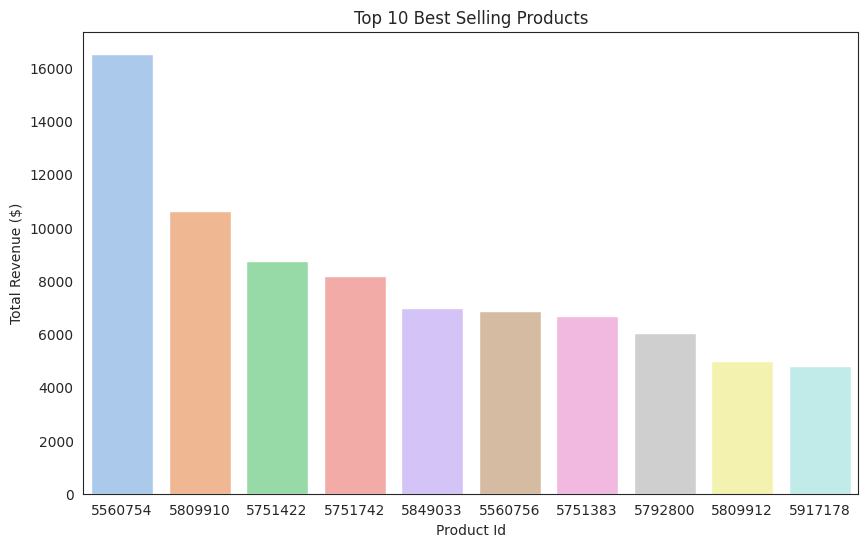

In [6]:
# Opportunity 1: Increase more customers
# 1) Acquiring new customers: find out the best selling products


# Combine the events table and the products table with a join
event_by_product = events.merge(products, how="inner", on="product_id")

# Group all the purchase events by product_id and calculate the sum of price as total revenue
revenue_by_product = event_by_product[event_by_product["event_type"] == "purchase"].groupby("product_id", as_index = False)["price"].sum().sort_values("price", ascending=False)
print(revenue_by_product)

# Visualize categorical data
plt.figure(figsize=(10, 6))
sns.set_style('white')
colors = sns.color_palette("pastel")
sns.barplot(x="product_id", y="price", data=revenue_by_product.head(10), palette=colors, order=revenue_by_product.head(10)['product_id'])
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product Id")
plt.ylabel("Total Revenue ($)")
plt.show()

The overall conversion rate for 2020 January is : 6.18%
The overall cart abandonment rate for 2020 January is : 69.55%


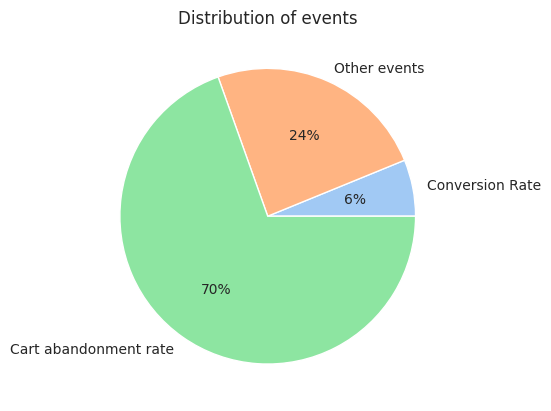

In [7]:
# Opportunity 1: Increase more customers
# 2) Retaining existing customers: find out the cart abandonment rate


# 1) Overall conversion rate
# Conversion Rate = Number of Conversions / Total Number of Visitors
num_of_conversions = (events["event_type"] == "purchase").sum()
total_num_of_visitors = raw.shape[0]
cart_cvr = round((num_of_conversions / total_num_of_visitors) * 100, 2)
print(f"The overall conversion rate for 2020 January is : {cart_cvr}%")


# 2) Cart abandonment rate per user session
# Combine the events table and the users table with a join
event_user = events.merge(users, how="inner", on="user_session")

# Calculate the number of conversions per user
conversions_per_user = event_user[event_user["event_type"] == "purchase"].groupby("user_id")["event_type"].value_counts().shape[0]

# Calculate the number of cart per user
cart_per_user = event_user[event_user["event_type"] == "cart"].groupby("user_id")["event_type"].value_counts().shape[0]

# Calculate the cart abandonment rate per user
cart_abandonment_rate_per_user = round((1 - (conversions_per_user / cart_per_user)) * 100, 2)
print(f"The overall cart abandonment rate for 2020 January is : {cart_abandonment_rate_per_user}%")

# Display the cart abandonment rate per user
labels = ["Conversion Rate", "Other events", "Cart abandonment rate"]
event_data = [6.18, 24.27, 69.55]
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
plt.pie(event_data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Distribution of events")
plt.show()

# Opportunity 2: Increase order frequency
- What do I want to know?
    - Customer behavior -> What time does order volume tend to be really high? 
- Why do I want to know?
    - To identify the most popular time when people complete their orders and the average purchase number per user.
- So what?
    - By knowing the time when order volume is high, we can send email or push notifications around that time to further incentivize users to complete their purchase at that specific time.
- Measure by?
    - event_type (view, cart, purchase) // event_time (weekday & hour)

        view   cart  purchase
hour                         
0      20941  12213      2543
1      16945  11018      2423
2      17824  11492      2748
3      24804  15185      2993
4      35001  20297      3760
5      51773  30906      6439
6      70894  40393      9082
7      88217  48082     11056
8      98214  55086     13777
9     108268  60187     16211
10    112868  61842     16289
11    117345  65937     17079
12    121012  67111     17495
13    118787  64057     16591
14    110606  59747     14688
15    107423  60186     14273
16    111568  62341     13429
17    122653  65584     14263
18    133704  73502     15074
19    140090  75966     16658
20    130105  70540     15543
21     88736  48158     10891
22     55979  30816      5938
23     33744  18016      4362


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


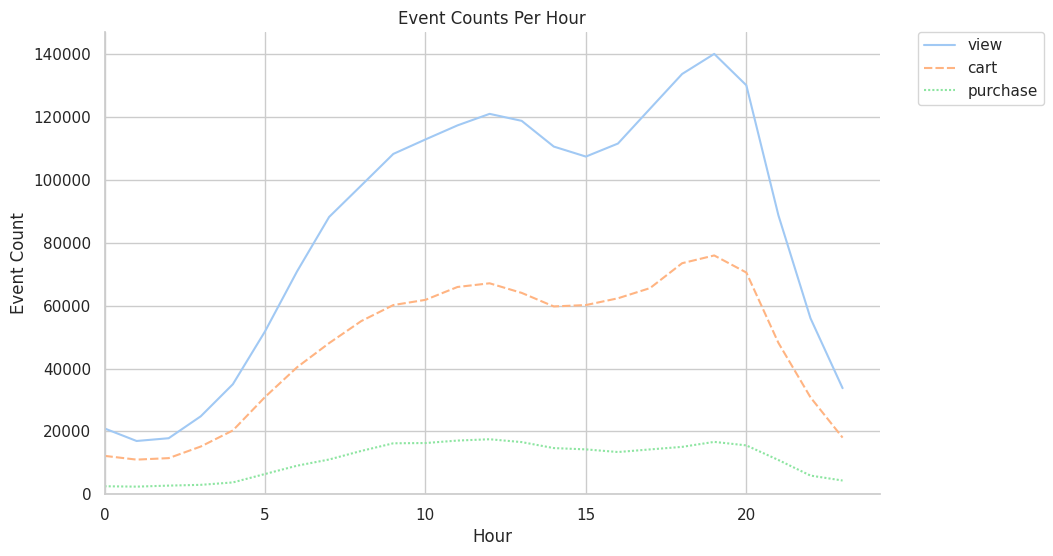

In [8]:
# Opportunity 2: Increase order frequency
# 1) Count the popular hour time


# Split event_time into date, time, weekday
events["date"] = events["event_time"].dt.date
events["time"] = events["event_time"].dt.time
events["weekday"] = events["event_time"].dt.weekday

# Add hour column
events["hour"] = events["time"].apply(lambda x: x.hour)

# Use for loop to get the event counts per hour
# Define the sorted event type first
event_type_sorted = ["view", "cart", "purchase"]

event_per_hour = {}
for event_type in event_type_sorted:
    event_count = events[events.event_type == event_type].groupby("hour")["event_type"].count()
    event_per_hour[event_type] = event_count

# Create a dataframe from a dictionary
event_per_hour_df = pd.DataFrame(event_per_hour)
print(event_per_hour_df)


#Visualize to line chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", 3)
sns.lineplot(data=event_per_hour_df, markers=False, palette=colors)
plt.title("Event Counts Per Hour")
plt.xlabel("Hour")
plt.ylabel("Event Count")
plt.legend(title="Event Type", loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0)
plt.ylim(0)
sns.despine()
plt.show()

     view    cart  purchase
0  289747  167504     43804
1  289280  165833     44376
2  315954  176258     37501
3  327399  181396     39248
4  318276  171022     39972
5  236737  126249     27013
6  260108  140400     31691


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


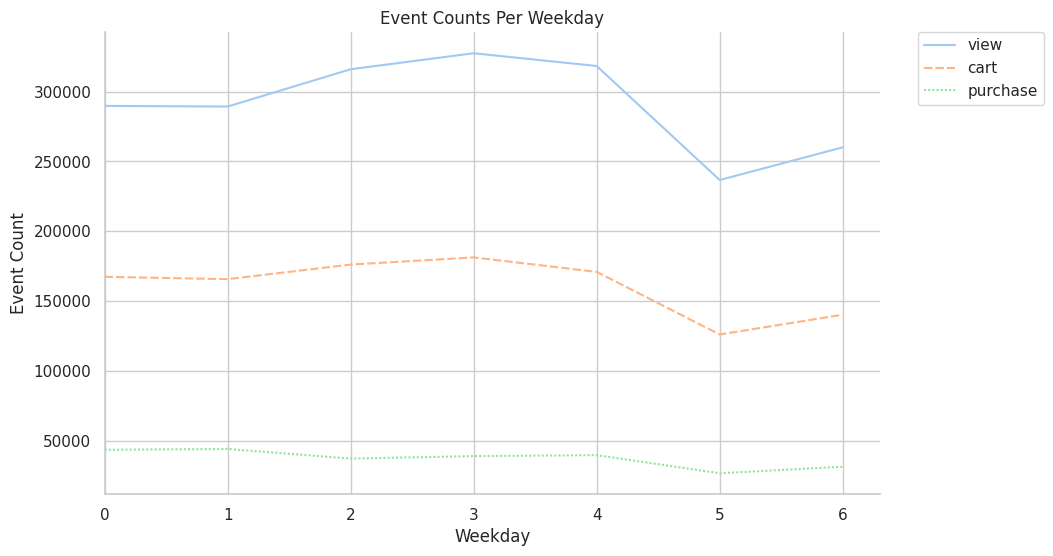

In [9]:
# Opportunity 2: Increase order frequency
# 2) Count the popular weekday

# Use for loop to get the event counts per weekday
event_per_weekday = {}
for event_type in event_type_sorted:
    event_count = events[events.event_type == event_type].groupby("weekday")["event_type"].count()
    event_per_weekday[event_type] = event_count

# Create a dataframe from a dictionary
weekdays_index = {0: "Monday",1: "Tuesday",2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
event_per_weekday_df = pd.DataFrame(event_per_weekday, index = weekdays_index)
print(event_per_weekday_df)

# Plot the line chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", 3)
sns.lineplot(data=event_per_weekday_df, markers=False, palette=colors)
plt.title("Event Counts Per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Event Count")
plt.legend(title="Event Type", loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0)
sns.despine()
plt.show()

The view and cart events per hour in a day have reached their peak at around **6 p.m - 8 p.m** with a nearly plateau in the morning between **8 a.m - 12 p.m**. On the other hand, the purchase event reached its peak around **9 a.m to 12 p.m** and gradually decreased afterwards until its second peak at rounghly **6 p.m - 7 p.m**. It's obvious that the weekday has a strong effect on customer buying behavior: the numbers of view and cart events are higher from Tuesday to Thursday, while purchase events have higher numbers on **Sunday and Monday**. 

Suggestions: By knowing the popular time and average number of purchases per user, we can introduce email marketing re-targeting to customers in view and cart events and offer promotional coupons for discounts. Offer free shipping for total purchases crossing a threshold and provide guest checkout functions with easy access to payment gateways.

# **Opportunity 3: Increase order value**
- What do I want to know?
    - Customer behavior -> What is the average order value? 
- Why do I want to know?
    - Incentivize users whose order value is less than the average to order more products.
- So what?
    - suggestions: 1. Set up free shipping threshold  2. Bundle complementary products 3.  Make time-sensitive offers 
- Measure by?
    - event_type // user_session // price

In [10]:
# Opportunity 3: Increase order value
# 1) What is the average order value?


# Merge events table with products table
# Select only product_id and user_session columns to exclude the column which is in datetime64 type from events table
product_sold = events[events["event_type"] == "purchase"][["product_id","user_session"]]
product_sold_price = product_sold.merge(products, how="left", on="product_id")[["user_session", "price"]]

# Group by user_session and sum up the price for products purchased
sum_product_sold_price = product_sold_price.groupby("user_session").sum().sort_values("price", ascending=False)

# Calculate the average order value by summing up the amount of price and dividing by the total number of users
average_order_value = round(sum_product_sold_price["price"].sum() / sum_product_sold_price.shape[0], 2)
print(f"The Average Order Value of each purchase is: {average_order_value}$!")

# How many percentage of users fall below the average order value?
users_count = sum_product_sold_price[sum_product_sold_price["price"] < average_order_value].shape[0]
users_fall_behind = round(users_count / sum_product_sold_price.shape[0] * 100, 2)
print(f"{users_fall_behind}% of users fall below the average order value.")

The Average Order Value of each purchase is: 43.03$!
63.89% of users fall below the average order value.


# Key Recommendations

1. **Increase customers**: Increase marketing/advertising effort in the best-selling products, while optimize on purchasing flow issues and improving the customer experience to drive acquisiton and retention.
    * Increase marketing/advertising effort in the best-selling products to acquire new users given it's high demand and revenue.
    * Conduct a deep-dive in checkout experience, increased shipping costs, ineffective remarketing promotions, or the absence of a guest check-out option to improve the customer experience.
2. **Increase order frequency** : Leverage communication capabilities (promotion email, push notifications) to increase order frequency.
    * Send email/push notifications around two order peak time( 9AM - 12PM, 6PM - 7PM) on Sunday and Monday to increase order frequency.
3. **Increase order value** : Test benefits / promotions to increase average order value
    * Incentivize users ( whose avo falls below 43.03$ via benefits/promotions to increase the number of products sold per order.